In [1]:
import pandas as pd
import zipfile
import os
from prophet import Prophet
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

``` python
load_df = pd.DataFrame(columns = ['Name','Load','Date'])

##### *Defining the functions to compile the data and unzip the folders*

``` python
def compile_data(name):
    # Reading the file
    df = pd.read_csv(f'data/Load Data/{name}') 
    # Extracting the date
    df['Date'] = pd.to_datetime(df['Time Stamp']).dt.date 
    # Droping the unnecessary columns
    df.drop(['Time Stamp','Time Zone','PTID'], axis = 1,inplace = True) 
    # Grouping the data to find avg load required and converting it to dataframe
    gr_df = df.groupby('Name')['Load'].mean().reset_index() 
    gr_df['Date'] = df['Date']
     # Concatenating with the global load_df
    global load_df
    load_df = pd.concat([load_df, gr_df], ignore_index=True)
    return load_df

``` python
def unzip_folder(zip_path,extract_to):
    # Open the zip file and extract contents
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
        print(f"Contents extracted to {extract_to}")

*All the data of load is taken from [New York ISO Independent Systems Operator](https://www.nyiso.com/)*

##### *Extracting the File's which where in zip format*

```python
# Define the base path
base_path = 'data/Load Data'

# Iterate through the range of years
for i in range(2008, 2025):
    # Construct the directory path
    directory_path = os.path.join(base_path, str(i))
    
    # Check if the directory exists
    if os.path.exists(directory_path):
        # Iterate through the files in the directory
        for zip_file in os.listdir(directory_path):
            # Construct the full path to the zip file
            zip_path = os.path.join(directory_path, zip_file)
            
            # Call your unzip function
            unzip_folder(zip_path, base_path)
    else:
        print(f"Directory for year {i} does not exist.")

##### *Compiling the Extracted Data*

``` python
# Define the base path
base_path = 'data/Load Data'

# Extracting the names of all the .csv files in Load Data folder
file_names = set([i for i in os.listdir(base_path) if i.endswith('.csv')])

``` python 
# Extracting and compiling the data from all .csv files with the help of  compile_data function
for name in file_names:
    compile_data(name) 

##### *Saving to .csv file*

``` python
load_df.to_csv('data/Newyork_state_load_data.csv')

##### *With the help of ChatGpt made this dictionery*

In [2]:
energy_zones_to_counties = {
    'CAPITL': [
        'Albany County', 'Schenectady County', 'Rensselaer County', 'Saratoga County',
        'Columbia County', 'Greene County', 'Washington County'
    ],
    'CENTRL': [
        'Onondaga County', 'Oswego County', 'Cayuga County', 'Cortland County',
        'Tompkins County', 'Madison County', 'Chenango County', 'Broome County'
    ],
    'DUNWOD': ['Rockland County', 'Orange County', 'Putnam County'],
    'GENESE': [
        'Monroe County', 'Genesee County', 'Livingston County', 'Ontario County',
        'Orleans County', 'Wyoming County'
    ],
    'HUD VL': [
        'Dutchess County', 'Ulster County', 'Sullivan County', 'Delaware County',
        'Schoharie County'
    ],
    'LONGIL': ['Nassau County', 'Suffolk County'],
    'MHK VL': [
        'Herkimer County', 'Oneida County', 'Montgomery County', 'Fulton County',
        'Schoharie County', 'Otsego County', 'Chenango County'
    ],
    'MILLWD': ['Westchester County'],
    'N.Y.C.': [
        'New York County', 'Bronx County', 'Queens County', 
        'Kings County', 'Richmond County'
    ],
    'NORTH': [
        'Clinton County', 'Essex County', 'Franklin County', 'Hamilton County',
        'St. Lawrence County', 'Jefferson County', 'Lewis County', 'Warren County'
    ],
    'WEST': [
        'Erie County', 'Niagara County', 'Chautauqua County', 'Cattaraugus County',
        'Allegany County', 'Steuben County', 'Chemung County', 'Tioga County',
        'Wayne County', 'Seneca County', 'Schuyler County', 'Yates County'
    ],
    'N.Y.C._LONGIL': ['Nassau County', 'Suffolk County', 'Bronx County', 'Queens County', 'Kings County']
}


##### *Loading the Population data*

In [3]:
population_df = pd.read_csv('data/Annual_Population_Newyork.csv')

In [4]:
population_df.head()

,FIPS Code,Geography,Year,Program Type,Population
0,36000,New York State,2001,Intercensal Population Estimate,19082838
1,36001,Albany County,2001,Intercensal Population Estimate,296232
2,36003,Allegany County,2001,Intercensal Population Estimate,50079
3,36005,Bronx County,2001,Intercensal Population Estimate,1346555
4,36007,Broome County,2001,Intercensal Population Estimate,200868


In [5]:
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1575 entries, 0 to 1574
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   FIPS Code     1575 non-null   int64 
 1   Geography     1575 non-null   object
 2   Year          1575 non-null   int64 
 3   Program Type  1575 non-null   object
 4   Population    1575 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 61.7+ KB


##### *Loading the Load data of Newyork state*

In [6]:
load_data_df = pd.read_csv('data/Newyork_state_load_data.csv')

In [7]:
load_data_df.head()

,Unnamed: 0,Name,Load,Date
0,0,CAPITL,1216.141724,2016-10-15
1,1,CENTRL,1510.761724,2016-10-15
2,2,DUNWOD,560.891034,2016-10-15
3,3,GENESE,912.815517,2016-10-15
4,4,HUD VL,920.286552,2016-10-15


In [8]:
load_data_df.drop(['Unnamed: 0'],axis=1,inplace = True)

In [9]:
load_data_df

,Name,Load,Date
0,CAPITL,1216.141724,2016-10-15
1,CENTRL,1510.761724,2016-10-15
2,DUNWOD,560.891034,2016-10-15
3,GENESE,912.815517,2016-10-15
4,HUD VL,920.286552,2016-10-15
...,...,...,...
92271,MHK VL,779.689944,2002-09-17
92272,MILLWD,211.041899,2002-09-17
92273,N.Y.C._LONGIL,9209.081006,2002-09-17
92274,NORTH,703.648045,2002-09-17


In [10]:
load_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92276 entries, 0 to 92275
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    92276 non-null  object 
 1   Load    92276 non-null  float64
 2   Date    92276 non-null  object 
dtypes: float64(1), object(2)
memory usage: 2.1+ MB


##### *Finding the Zonal-weightage of the each county according to population of each county*

In [11]:
# Initialize a list to store the results
results = []

# Iterate through each year in the population data
for year in population_df["Year"].unique():
    # Filter data for the current year
    year_data = population_df[population_df["Year"] == year]

    # Calculate zonal weightages
    for zone, counties in energy_zones_to_counties.items():
        # Filter counties in the current zone
        zone_data = year_data[year_data["Geography"].isin(counties)]
        
        # Calculate total population for the zone
        zone_population = zone_data["Population"].sum()
        
        # Calculate the weightage for each county in the zone
        for _, row in zone_data.iterrows():
            weightage = row["Population"] / zone_population if zone_population > 0 else 0
            results.append({"Year": year, "Zone": zone, "County": row["Geography"], "Weightage": weightage})

# Convert the results into a DataFrame
zonal_weightage_df = pd.DataFrame(results)

##### *Finding the Load of each county as per their Weightage*

In [12]:
# Convert the Date column in load_data_df to datetime format and extract the year
load_data_df["Date"] = pd.to_datetime(load_data_df["Date"])
load_data_df["Year"] = load_data_df["Date"].dt.year

# Merge load data with zonal weightage data on 'Year' and 'Zone'
merged_df = pd.merge(
    load_data_df.rename(columns={"Name": "Zone"}),  # Rename 'Name' to 'Zone' for consistency
    zonal_weightage_df,
    on=["Year", "Zone"],
    how="inner"
)

# Calculate the load for each county
merged_df["County Load"] = merged_df["Load"] * merged_df["Weightage"]

# Select relevant columns for the final output
county_load_df = merged_df[["Date", "County", "County Load"]]


In [13]:
county_load_df = county_load_df.groupby(["Date",'County'], as_index=False).sum()

In [14]:
county_load_df

,Date,County,County Load
0,2001-07-01,Albany County,400.786936
1,2001-07-01,Allegany County,43.408513
2,2001-07-01,Bronx County,1505.651617
3,2001-07-01,Broome County,320.510401
4,2001-07-01,Cattaraugus County,72.244372
...,...,...,...
503171,2023-12-31,Washington County,73.087174
503172,2023-12-31,Wayne County,84.145066
503173,2023-12-31,Westchester County,313.968751
503174,2023-12-31,Wyoming County,39.310160


In [15]:
county_load_df.to_csv('data/Counties load data.csv')

##### *Pivotting the `county_load_df`*

In [16]:
# Pivot the DataFrame to make counties the columns and dates the rows
pivoted_county_load_df = county_load_df.pivot(index="Date", columns="County", values="County Load")

# Reset the index to make Date a column for easier readability
pivoted_county_load_df.reset_index(inplace=True)

In [17]:
pivoted_county_load_df.to_csv('data/Counties load data.csv')

In [18]:
pivoted_county_load_df.columns

Index(['Date', 'Albany County', 'Allegany County', 'Bronx County',
       'Broome County', 'Cattaraugus County', 'Cayuga County',
       'Chautauqua County', 'Chemung County', 'Chenango County',
       'Clinton County', 'Columbia County', 'Cortland County',
       'Delaware County', 'Dutchess County', 'Erie County', 'Essex County',
       'Franklin County', 'Fulton County', 'Genesee County', 'Greene County',
       'Hamilton County', 'Herkimer County', 'Jefferson County',
       'Kings County', 'Lewis County', 'Livingston County', 'Madison County',
       'Monroe County', 'Montgomery County', 'Nassau County',
       'New York County', 'Niagara County', 'Oneida County', 'Onondaga County',
       'Ontario County', 'Orange County', 'Orleans County', 'Oswego County',
       'Otsego County', 'Putnam County', 'Queens County', 'Rensselaer County',
       'Richmond County', 'Rockland County', 'Saratoga County',
       'Schenectady County', 'Schoharie County', 'Schuyler County',
       'Seneca 

#### *Forecasting for the Future Years*

In [19]:
data=pd.read_csv('data/Counties load data.csv')

In [20]:
data.head()

,Unnamed: 0,Date,Albany County,Allegany County,Bronx County,Broome County,Cattaraugus County,Cayuga County,Chautauqua County,Chemung County,...,Sullivan County,Tioga County,Tompkins County,Ulster County,Warren County,Washington County,Wayne County,Westchester County,Wyoming County,Yates County
0,0,2001-07-01,400.786936,43.408513,1505.651617,320.510401,72.244372,129.745217,120.251262,78.688168,...,174.689328,44.823998,155.506615,420.424905,88.399279,82.722038,81.300706,271.272455,41.075473,21.431648
1,1,2001-07-02,356.126787,45.096980,1288.498630,306.149810,75.054472,123.931933,124.928693,81.748913,...,142.126558,46.567524,148.539081,342.056068,88.716065,73.504226,84.463071,196.579946,41.512057,22.265277
2,2,2001-07-03,354.174723,45.640169,1276.179963,297.505475,75.958497,120.432636,126.433449,82.733572,...,143.290119,47.128426,144.344985,344.856411,88.149746,73.101322,85.480422,189.067606,41.779259,22.533461
3,3,2001-07-04,341.019445,40.866154,1204.036220,273.595114,68.013148,110.753527,113.208361,74.079543,...,145.658633,42.198737,132.744054,350.556715,86.684024,70.386086,76.539069,171.461749,38.312489,20.176434
4,4,2001-07-05,389.122565,46.643297,1476.151201,308.350258,77.627992,124.822692,129.212335,84.551977,...,170.663693,48.164264,149.606704,410.736405,88.356401,80.314523,87.359200,223.942935,44.191969,23.028725


In [21]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [22]:
data.head()

,Date,Albany County,Allegany County,Bronx County,Broome County,Cattaraugus County,Cayuga County,Chautauqua County,Chemung County,Chenango County,...,Sullivan County,Tioga County,Tompkins County,Ulster County,Warren County,Washington County,Wayne County,Westchester County,Wyoming County,Yates County
0,2001-07-01,400.786936,43.408513,1505.651617,320.510401,72.244372,129.745217,120.251262,78.688168,144.645462,...,174.689328,44.823998,155.506615,420.424905,88.399279,82.722038,81.300706,271.272455,41.075473,21.431648
1,2001-07-02,356.126787,45.096980,1288.498630,306.149810,75.054472,123.931933,124.928693,81.748913,140.279448,...,142.126558,46.567524,148.539081,342.056068,88.716065,73.504226,84.463071,196.579946,41.512057,22.265277
2,2001-07-03,354.174723,45.640169,1276.179963,297.505475,75.958497,120.432636,126.433449,82.733572,140.759873,...,143.290119,47.128426,144.344985,344.856411,88.149746,73.101322,85.480422,189.067606,41.779259,22.533461
3,2001-07-04,341.019445,40.866154,1204.036220,273.595114,68.013148,110.753527,113.208361,74.079543,132.253609,...,145.658633,42.198737,132.744054,350.556715,86.684024,70.386086,76.539069,171.461749,38.312489,20.176434
4,2001-07-05,389.122565,46.643297,1476.151201,308.350258,77.627992,124.822692,129.212335,84.551977,151.404471,...,170.663693,48.164264,149.606704,410.736405,88.356401,80.314523,87.359200,223.942935,44.191969,23.028725


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8157 entries, 0 to 8156
Data columns (total 63 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 8157 non-null   object 
 1   Albany County        8157 non-null   float64
 2   Allegany County      8157 non-null   float64
 3   Bronx County         8157 non-null   float64
 4   Broome County        8157 non-null   float64
 5   Cattaraugus County   8157 non-null   float64
 6   Cayuga County        8157 non-null   float64
 7   Chautauqua County    8157 non-null   float64
 8   Chemung County       8157 non-null   float64
 9   Chenango County      8157 non-null   float64
 10  Clinton County       8157 non-null   float64
 11  Columbia County      8157 non-null   float64
 12  Cortland County      8157 non-null   float64
 13  Delaware County      8157 non-null   float64
 14  Dutchess County      8157 non-null   float64
 15  Erie County          8157 non-null   f

##### *Following links helps me know about Prophet method*

1. [Time Series Advance Analytics techniques](https://www.advancinganalytics.co.uk/blog/2021/06/22/10-incredibly-useful-time-series-forecasting-algorithms)
2. [Prophet Method Details](https://iopscience.iop.org/article/10.1088/1742-6596/2356/1/012002/pdf#:~:text=Finally%2C%20the%20Prophet%20model%20is,the%20electricity%20load%20forecasting%20model)


##### *Converting the Date column and handeling any missing value if any*

In [24]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Fill missing values with forward-fill method
data.fillna(method='ffill', inplace=True)

C:\Users\hasee\AppData\Local\Temp\ipykernel_41488\2076014812.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


##### *Defining the Prophet Forecast Model function*

In [25]:
# Function to prepare data for Prophet model
def prepare_data_for_prophet(df, date_col, value_col):
    """
    Prepares a dataframe for Prophet by renaming columns to 'ds' and 'y'.
    Args:
        df: Original dataframe
        date_col: Name of the column containing dates
        value_col: Name of the column containing the values
    Returns:
        Prepared dataframe
    """
    prepared_df = df[[date_col, value_col]].rename(columns={date_col: 'ds', value_col: 'y'})
    return prepared_df

# Function to train and forecast using Prophet
def forecast_county(data, county_name, future_years=2050):
    """
    Trains a Prophet model and forecasts future values for a given county.
    Args:
        data: Original dataframe
        county_name: Name of the county column to forecast
        future_years: Year up to which to forecast
    Returns:
        Dataframe containing forecasted values
    """
    # Prepare data for the selected county
    county_data = prepare_data_for_prophet(data, 'Date', county_name)
    
    # Initialize Prophet model
    model = Prophet()
    model.fit(county_data)
    
    # Create a dataframe for future dates
    last_date = county_data['ds'].max()
    future_dates = model.make_future_dataframe(periods=(future_years - last_date.year) * 365)
    
    # Forecast
    forecast = model.predict(future_dates)
    return forecast[['ds', 'yhat']]

##### *Applying Prophet Forecast Model for all the Counties and saving it into the file*

``` Python
# Saving this code after running so that if somebody restart the kernel prediction not get reset

# Apply forecasting for all counties
counties = data.columns[1:]  # Skip 'Date' column
all_forecasts = pd.DataFrame()

for county in counties:
    print(f"Forecasting for {county}...")
    forecast = forecast_county(data, county)
    forecast.rename(columns={'yhat': county}, inplace=True)
    
    # Merge forecasts into a single dataframe
    if all_forecasts.empty:
        all_forecasts = forecast
    else:
        all_forecasts = pd.merge(all_forecasts, forecast, on='ds', how='outer')

# Save the combined forecast to a CSV file
output_file = 'Counties_Forecast.csv'
all_forecasts.rename(columns={'ds': 'Date'}, inplace=True)
all_forecasts.to_csv(f'data/{output_file}', index=False)

print(f"Combined forecast saved to {output_file}.")

#### *Extracting load data from 2005 to 2030*

In [31]:
# Defining the function
def extract_data (file,start_date,end_date):
    df = pd.read_csv(f'data/{file}')
    df['Date'] = pd.to_datetime(df['Date'])
    df.sort_values(by='Date', inplace = True)
    df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
    return df.to_csv(f'data/load_data_from_{start_date}_to_{end_date}.csv')

In [32]:
extract_data('Counties_Forecast.csv','2005-01-01','2030-12-31')

#### *EDA* 

In [2]:
# Load the dataset 
file_path = 'data/load_data_from_2005-01-01_to_2030-12-31.csv'  
data = pd.read_csv(file_path)

In [3]:
data.head()

,Unnamed: 0,Date,Albany County,Allegany County,Bronx County,Broome County,Cattaraugus County,Cayuga County,Chautauqua County,Chemung County,...,Sullivan County,Tioga County,Tompkins County,Ulster County,Warren County,Washington County,Wayne County,Westchester County,Wyoming County,Yates County
0,1249,2005-01-01,385.824395,47.852876,1056.999409,338.405186,78.791350,136.752769,130.515727,85.267917,...,144.447614,49.303390,167.487826,344.156429,102.616103,79.463753,89.603843,283.098020,44.070867,23.940731
1,1250,2005-01-02,382.510192,46.716039,1035.148848,335.403085,76.911964,135.536662,127.384184,83.206654,...,142.753961,48.122045,166.005928,340.115881,102.551720,78.771234,87.443372,278.036938,43.233926,23.360655
2,1251,2005-01-03,413.817753,51.964372,1159.247261,366.889046,85.550804,147.967085,141.768989,92.672260,...,152.041783,53.571452,182.129671,361.978195,104.773214,85.092993,97.489635,298.783158,48.386694,26.068266
3,1252,2005-01-04,419.693665,52.752776,1176.636881,371.400422,86.842858,149.732348,143.919363,94.085122,...,153.756477,54.390108,184.472636,365.989918,105.235669,86.266557,99.006758,302.620810,49.161575,26.478622
4,1253,2005-01-05,419.800236,52.863439,1179.582334,370.351783,87.018823,149.302272,144.210205,94.273773,...,153.957201,54.504436,183.959653,366.424916,105.417424,86.279410,99.226651,303.233173,49.233988,26.539589


In [5]:
# Dropping the Unamed: 0
data.drop('Unnamed: 0', axis =1, inplace = True)

In [6]:
# Preprocessing: Convert Date column to datetime and set as index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [7]:
# Create Total Consumption column
data['Total Consumption'] = data.iloc[:, :-1].sum(axis=1)

##### *1. Seasonality Analysis: Monthly Averages*

C:\Users\hasee\AppData\Local\Temp\ipykernel_64988\2986703909.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = data['Total Consumption'].resample('M').mean()


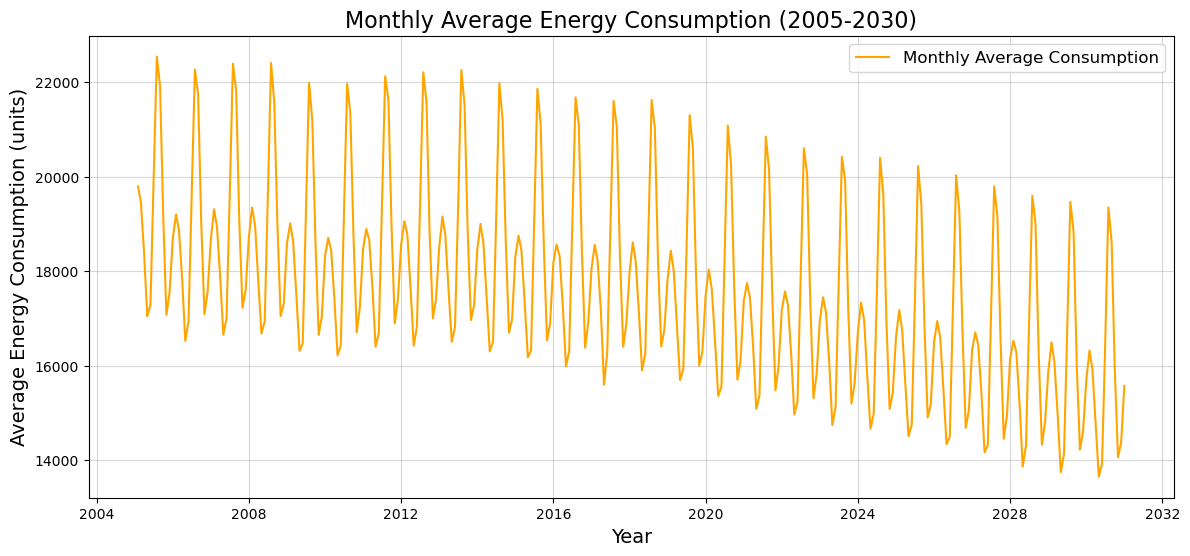

In [9]:
monthly_avg = data['Total Consumption'].resample('M').mean()
plt.figure(figsize=(14, 6))
plt.plot(monthly_avg, label='Monthly Average Consumption', color='orange')
plt.title('Monthly Average Energy Consumption (2005-2030)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Energy Consumption (units)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.savefig('data/visualization/monthly_average_energy_consumption.png')
plt.show()

##### *2. County-Level Analysis: Top Consumer County in Avg Megawatts Per Day Over the Years*

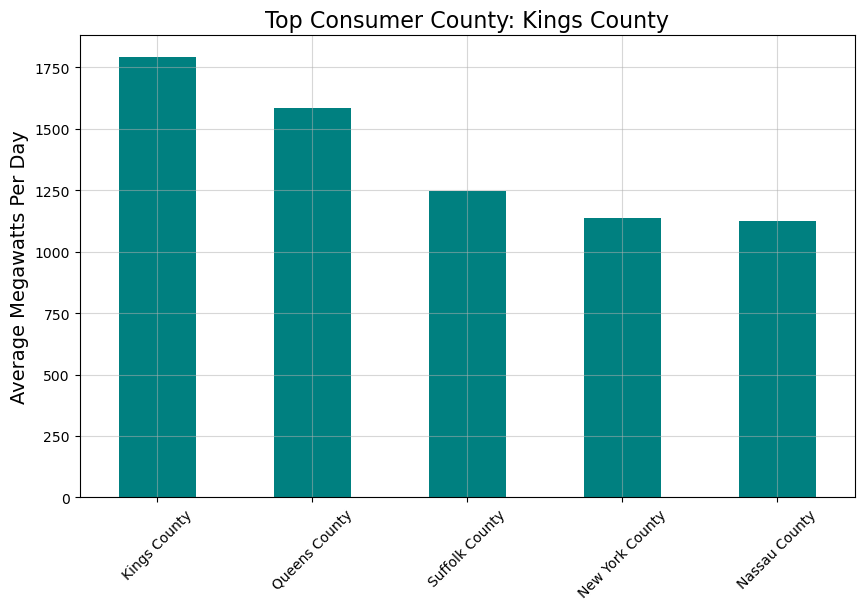

In [13]:
daily_avg = data.iloc[:, :-1].resample('D').mean().mean()
top_consumer_county = daily_avg.idxmax()
plt.figure(figsize=(10, 6))
daily_avg.sort_values(ascending=False).head(5).plot(kind='bar', color='teal')
plt.title(f'Top Consumer County: {top_consumer_county}', fontsize=16)
plt.ylabel('Average Megawatts Per Day', fontsize=14)
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.savefig('data/visualization/top_consumer_county_avg_megawatts_per_day.png')
plt.show()

##### *3. Total Megawatts Per Day for the Whole State Over the Year*

C:\Users\hasee\AppData\Local\Temp\ipykernel_64988\2856995997.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  state_yearly_avg = data['Total Consumption'].resample('Y').mean()


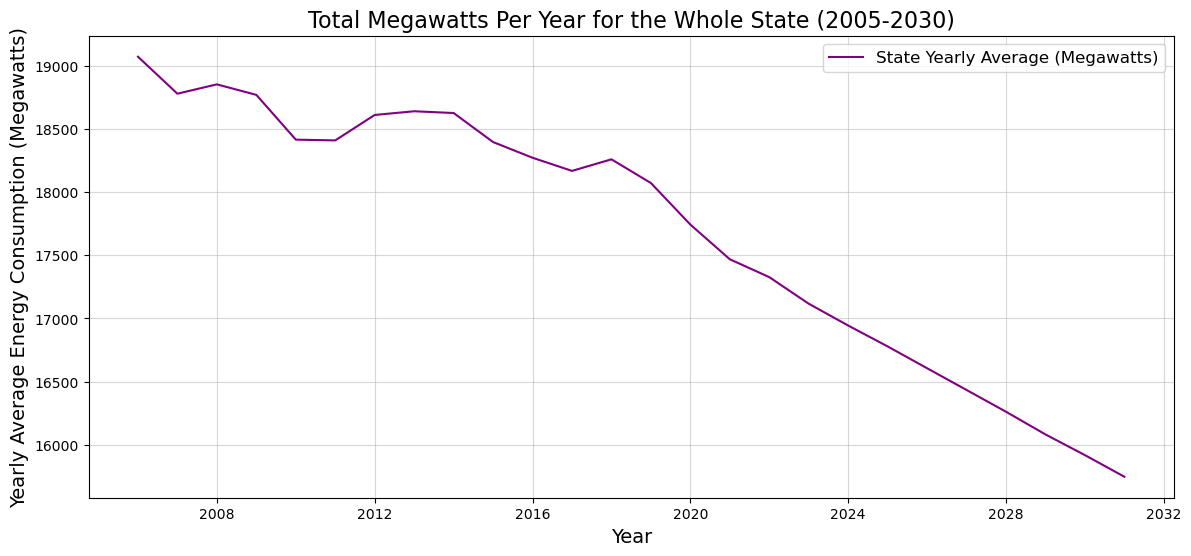

In [14]:
state_yearly_avg = data['Total Consumption'].resample('Y').mean()
plt.figure(figsize=(14, 6))
plt.plot(state_yearly_avg, label='State Yearly Average (Megawatts)', color='purple')
plt.title('Total Megawatts Per Year for the Whole State (2005-2030)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Yearly Average Energy Consumption (Megawatts)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.savefig('data/visualization/state_yearly_avg_megawatts_per_year.png')
plt.show()

##### *4. Comparing Past and Predicted Trends*

C:\Users\hasee\AppData\Local\Temp\ipykernel_64988\2443566047.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  past_monthly_data = data.loc[data.index < '2024-01-01', 'Total Consumption'].resample('M').sum()
C:\Users\hasee\AppData\Local\Temp\ipykernel_64988\2443566047.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_monthly_data = data.loc[data.index >= '2024-01-01', 'Total Consumption'].resample('M').sum()


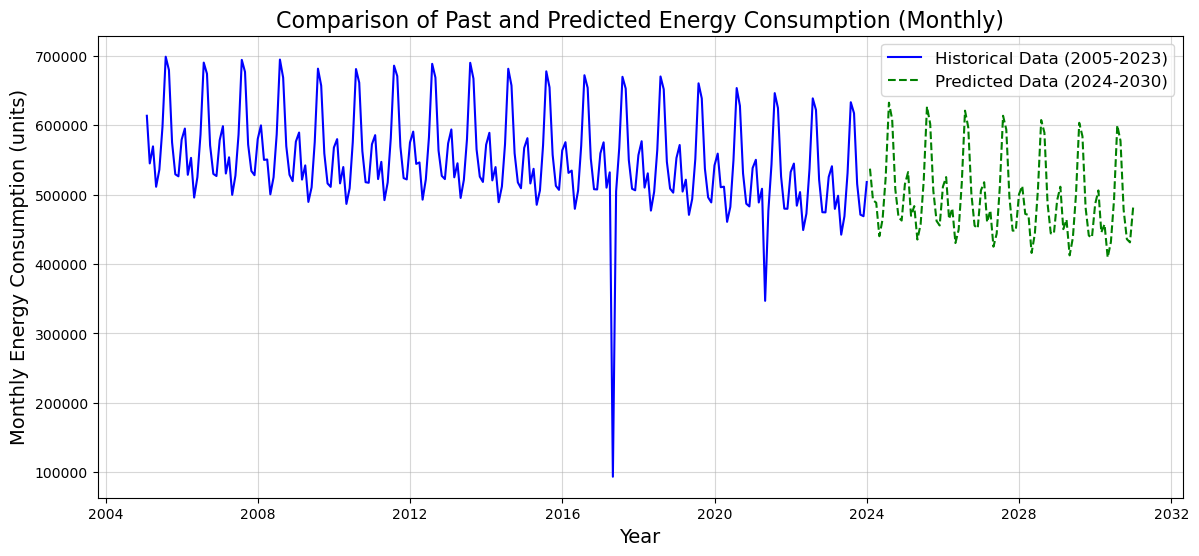

In [16]:
past_monthly_data = data.loc[data.index < '2024-01-01', 'Total Consumption'].resample('M').sum()
future_monthly_data = data.loc[data.index >= '2024-01-01', 'Total Consumption'].resample('M').sum()

plt.figure(figsize=(14, 6))
plt.plot(past_monthly_data, label='Historical Data (2005-2023)', color='blue')
plt.plot(future_monthly_data, label='Predicted Data (2024-2030)', color='green', linestyle='--')
plt.title('Comparison of Past and Predicted Energy Consumption (Monthly)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Monthly Energy Consumption (units)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.savefig('data/visualization/past_vs_predicted_monthly_energy_consumption.png')
plt.show()